## DiPy Tests

### Imports

In [2]:
import dipy

In [3]:
dipy.__version__

'1.11.0'

### Tutorial from DiPy website

In [2]:
from os.path import expanduser, join

import matplotlib.pyplot as plt

from dipy.core.gradients import gradient_table
from dipy.data import fetch_sherbrooke_3shell
from dipy.io import read_bvals_bvecs
from dipy.io.image import load_nifti, save_nifti

In [4]:
fetch_sherbrooke_3shell()

({'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66'),
  'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7')},
 'C:\\Users\\danie\\.dipy\\sherbrooke_3shell')

In [5]:
home = expanduser("~")

In [6]:
dname = join(home, ".dipy", "sherbrooke_3shell")

In [7]:
fdwi = join(dname, "HARDI193.nii.gz")

print(fdwi)

fbval = join(dname, "HARDI193.bval")

print(fbval)

fbvec = join(dname, "HARDI193.bvec")

print(fbvec)

C:\Users\danie\.dipy\sherbrooke_3shell\HARDI193.nii.gz
C:\Users\danie\.dipy\sherbrooke_3shell\HARDI193.bval
C:\Users\danie\.dipy\sherbrooke_3shell\HARDI193.bvec


In [8]:
data, affine, img = load_nifti(fdwi, return_img=True)

In [9]:
print(data.shape)

(128, 128, 60, 193)


In [10]:
print(img.header.get_zooms()[:3])

(np.float32(2.0), np.float32(2.0), np.float32(2.0))


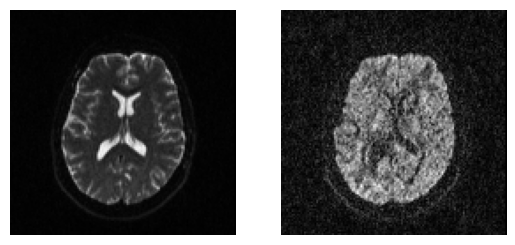

In [14]:
axial_middle = data.shape[2] // 2
plt.figure("Showing the datasets")
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap="gray", origin="lower")
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap="gray", origin="lower")
plt.show()
# plt.savefig("data.png", bbox_inches="tight")

In [15]:
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [16]:
gtab = gradient_table(bvals, bvecs=bvecs)

In [17]:
print(gtab.info)

B-values shape (193,)
         min 0.000000
         max 3500.000000
B-vectors shape (193, 3)
          min -0.964050
          max 0.999992

None


In [18]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [19]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


In [20]:
print(len(gtab))

193


In [22]:
S0s = data[:, :, :, gtab.b0s_mask]

In [23]:
print(S0s.shape)

(128, 128, 60, 1)


In [ ]:
# save_nifti("HARDI193_S0.nii.gz", S0s, affine)

### Trying to Convert our DICOM to NIfTI

#### First check if it's a diffusion scan

In [27]:
import pydicom
ds = pydicom.dcmread('Tractography_1/CT1.3.46.670589.33.1.63712265299310888300001.4674899677990915474.dcm')
print(ds.SeriesDescription)  # Check if it's a diffusion scan


iDose (1)


In [4]:
ds

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 278
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: RT Structure Set Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.752.243.1.1.20250603150659536.9600.82840
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.1.2.100.8.40.1101.0
(0002,0013) Implementation Version Name         SH: 'DicomObjects.NET'
(0002,0100) Private Information Creator UID     UI: 1.2.826.0.1.3680043.1.2.100.8.40.1101.0
(0002,0102) Private Information                 OB: b'DicomObjects.NET'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0012) Instance Creation Date              DA: '20250603'
(0008,0013) Instance Creation Time              TM: '150659.000000'
(0008

In [ ]:
import os
import pydicom

dicom_dir = "Tractography_1"
SeriesDescriptions = []
b_vals = []

for fname in os.listdir(dicom_dir):
    try:
        path = os.path.join(dicom_dir, fname)
        ds = pydicom.dcmread(path, stop_before_pixels=True)
        print("File:", fname)
        print("  Modality:", ds.get("Modality", "N/A"))
        print("  SeriesDescription:", ds.get("SeriesDescription", "N/A"))
        if ds.get("Modality", "N/A") == "MR" and ds.get("SeriesDescription", "N/A") not in SeriesDescriptions:
            SeriesDescriptions.append(ds.get("SeriesDescription", "N/A"))

        if ds.get("Modality", "N/A") == "MR" and ds.get((0x0018, 0x9087), "N/A") not in b_vals:
            b_vals.append(ds.get((0x0018, 0x9087), "N/A"))
            
        print("  ProtocolName:", ds.get("ProtocolName", "N/A"))
        print("  Manufacturer:", ds.get("Manufacturer", "N/A"))
        print("  b-value:", ds.get((0x0018, 0x9087), "N/A"))  # Diffusion b-value tag
        print()
    except Exception as e:
        print(f"Could not read {fname}: {e}")


File: CT1.3.46.670589.33.1.63712265299310888300001.4674899677990915474.dcm
  Modality: CT
  SeriesDescription: iDose (1)
  ProtocolName: CK Brain 1x1 /TOHCC BRAIN
  Manufacturer: Philips
  b-value: N/A

File: CT1.3.46.670589.33.1.63712265299640907200001.5515793014393447337.dcm
  Modality: CT
  SeriesDescription: iDose (1)
  ProtocolName: CK Brain 1x1 /TOHCC BRAIN
  Manufacturer: Philips
  b-value: N/A

File: CT1.3.46.670589.33.1.63712265299660908300001.4950842178744186228.dcm
  Modality: CT
  SeriesDescription: iDose (1)
  ProtocolName: CK Brain 1x1 /TOHCC BRAIN
  Manufacturer: Philips
  b-value: N/A

File: CT1.3.46.670589.33.1.63712265300280943800001.5501822398989622416.dcm
  Modality: CT
  SeriesDescription: iDose (1)
  ProtocolName: CK Brain 1x1 /TOHCC BRAIN
  Manufacturer: Philips
  b-value: N/A

File: CT1.3.46.670589.33.1.63712265300295944600001.5626395263988221236.dcm
  Modality: CT
  SeriesDescription: iDose (1)
  ProtocolName: CK Brain 1x1 /TOHCC BRAIN
  Manufacturer: Philips
 

In [21]:
import subprocess
from pathlib import Path

dicom_dir = Path("Tractography_1")
nifti_dir = Path("Tractography_1_NIfTI")

nifti_dir.mkdir(parents=True, exist_ok=True)

cmd = [
    "dcm2niix",
    "-z", "y",
    "-f", "%p_%s",
    "-o", str(nifti_dir),
    str(dicom_dir)
]

subprocess.run(cmd, check=True)

CompletedProcess(args=['dcm2niix', '-z', 'y', '-f', '%p_%s', '-o', 'Tractography_1_NIfTI', 'Tractography_1'], returncode=0)